In [35]:
# prepare 
import numpy as np
import pylab as pb
import GPy as gpy
import matplotlib
from matplotlib import pyplot as plt
from numpy.linalg import inv
from IPython.display import display
from scipy.fftpack import fft, ifft
pb.ion()
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.figsize'] = (8,5)

In [36]:
# data matrix X (n-by-T); X ~ MN(M,U,V)
# given mean of data M (n-by-t) is zero. 
# U is n-by-n. V is t-by-t
# two covariances: 
# sigma_N = E(X*X.T) = U*tr(V)
# sigma_T = E(X.T*X) = V*tr(U)
# so, tr(sigma_N) =  tr(V) * tr(T) 
# The two given sigma_N and sigma_T need to satisfy (1) semi-definite positive (2) tr(sigma_N) = tr(sigma_T) 
# covariance parameters are non-identifiable in the sense that for any scale factor, s>0, we have MN(M,U,V) = MN(M,sU,1/sV)

fs = 10.0  #  time step:1/fs
t = np.arange(0,10,1/fs)[np.newaxis].transpose()
n = np.arange(0,5,1)[np.newaxis].transpose() 

# given two covariance:  sigma_N and sigma_T
k1 = gpy.kern.RBF(1, variance=2, lengthscale=1)
sigma_N = k1.K(n)
print np.matrix.trace(sigma_N)

k2 = gpy.kern.RBF(1, variance=2.0*n.size/t.size, lengthscale=2)
sigma_T = k2.K(t)
print np.matrix.trace(sigma_T)

10.0
10.0


In [37]:
print sigma_N
print sigma_T

[[  2.00000000e+00   1.21306132e+00   2.70670566e-01   2.22179931e-02
    6.70925256e-04]
 [  1.21306132e+00   2.00000000e+00   1.21306132e+00   2.70670566e-01
    2.22179931e-02]
 [  2.70670566e-01   1.21306132e+00   2.00000000e+00   1.21306132e+00
    2.70670566e-01]
 [  2.22179931e-02   2.70670566e-01   1.21306132e+00   2.00000000e+00
    1.21306132e+00]
 [  6.70925256e-04   2.22179931e-02   2.70670566e-01   1.21306132e+00
    2.00000000e+00]]
[[  1.00000000e-01   9.98750781e-02   9.95012479e-02 ...,   7.80106730e-07
    6.11356797e-07   4.77913973e-07]
 [  9.98750781e-02   1.00000000e-01   9.98750781e-02 ...,   9.92950431e-07
    7.80106730e-07   6.11356797e-07]
 [  9.95012479e-02   9.98750781e-02   1.00000000e-01 ...,   1.26071052e-06
    9.92950431e-07   7.80106730e-07]
 ..., 
 [  7.80106730e-07   9.92950431e-07   1.26071052e-06 ...,   1.00000000e-01
    9.98750781e-02   9.95012479e-02]
 [  6.11356797e-07   7.80106730e-07   9.92950431e-07 ...,   9.98750781e-02
    1.00000000e-01 

In [38]:
# sigma_N/tr(sigma_T) = U/tr(U) 
# sigma_T/tr(sigma_N) = V/tr(V) 

# tr(sigma_N) =  tr(V) * tr(T) 
# let tr(U) = a and tr(V) = tr(sigma_N)/a
# a can be any positive number, i.e. 
a = 1.0
U = sigma_N/np.matrix.trace(sigma_T)* a
V = sigma_T/np.matrix.trace(sigma_N)* np.matrix.trace(sigma_N)/a

In [39]:
print U
print V

[[  2.00000000e-01   1.21306132e-01   2.70670566e-02   2.22179931e-03
    6.70925256e-05]
 [  1.21306132e-01   2.00000000e-01   1.21306132e-01   2.70670566e-02
    2.22179931e-03]
 [  2.70670566e-02   1.21306132e-01   2.00000000e-01   1.21306132e-01
    2.70670566e-02]
 [  2.22179931e-03   2.70670566e-02   1.21306132e-01   2.00000000e-01
    1.21306132e-01]
 [  6.70925256e-05   2.22179931e-03   2.70670566e-02   1.21306132e-01
    2.00000000e-01]]
[[  1.00000000e-01   9.98750781e-02   9.95012479e-02 ...,   7.80106730e-07
    6.11356797e-07   4.77913973e-07]
 [  9.98750781e-02   1.00000000e-01   9.98750781e-02 ...,   9.92950431e-07
    7.80106730e-07   6.11356797e-07]
 [  9.95012479e-02   9.98750781e-02   1.00000000e-01 ...,   1.26071052e-06
    9.92950431e-07   7.80106730e-07]
 ..., 
 [  7.80106730e-07   9.92950431e-07   1.26071052e-06 ...,   1.00000000e-01
    9.98750781e-02   9.95012479e-02]
 [  6.11356797e-07   7.80106730e-07   9.92950431e-07 ...,   9.98750781e-02
    1.00000000e-01 

In [40]:
# estimate covariance using data drawn 

x_N = 0 # estimate of sigma_N
x_T = 0 # estimate of sigma_T

for i in xrange(1, 1000):
    x = np.random.multivariate_normal(np.zeros(t.size*n.size), np.kron(V,U), 1).reshape(t.size,n.size).T
    x = np.asmatrix(x)
    #
    x_N = x_N + x * np.transpose(x) 
    x_T = x_T + np.transpose(x) * x  
     
x_N = x_N/1000
x_T = x_T/1000

 C:\Users\Ruoxi\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: RuntimeWarning:covariance is not positive-semidefinite.


In [41]:
# x_N is covariance of data drawn
# sigma_N is ground truth
# x_N and sigma_N should be the same (confirmed)
print sigma_N
print x_N

[[  2.00000000e+00   1.21306132e+00   2.70670566e-01   2.22179931e-02
    6.70925256e-04]
 [  1.21306132e+00   2.00000000e+00   1.21306132e+00   2.70670566e-01
    2.22179931e-02]
 [  2.70670566e-01   1.21306132e+00   2.00000000e+00   1.21306132e+00
    2.70670566e-01]
 [  2.22179931e-02   2.70670566e-01   1.21306132e+00   2.00000000e+00
    1.21306132e+00]
 [  6.70925256e-04   2.22179931e-02   2.70670566e-01   1.21306132e+00
    2.00000000e+00]]
[[ 2.10973975  1.27057188  0.27652615  0.00817815  0.06280806]
 [ 1.27057188  1.9715217   1.15637631  0.23454235  0.06778911]
 [ 0.27652615  1.15637631  1.93354383  1.14785778  0.25466838]
 [ 0.00817815  0.23454235  1.14785778  1.90715757  1.17363894]
 [ 0.06280806  0.06778911  0.25466838  1.17363894  2.00179282]]


In [42]:
# x_T is covariance of data drawn
# sigma_T is ground truth
# x_T and sigma_T should be the same(confirmed)
print sigma_T
print x_T

[[  1.00000000e-01   9.98750781e-02   9.95012479e-02 ...,   7.80106730e-07
    6.11356797e-07   4.77913973e-07]
 [  9.98750781e-02   1.00000000e-01   9.98750781e-02 ...,   9.92950431e-07
    7.80106730e-07   6.11356797e-07]
 [  9.95012479e-02   9.98750781e-02   1.00000000e-01 ...,   1.26071052e-06
    9.92950431e-07   7.80106730e-07]
 ..., 
 [  7.80106730e-07   9.92950431e-07   1.26071052e-06 ...,   1.00000000e-01
    9.98750781e-02   9.95012479e-02]
 [  6.11356797e-07   7.80106730e-07   9.92950431e-07 ...,   9.98750781e-02
    1.00000000e-01   9.98750781e-02]
 [  4.77913973e-07   6.11356797e-07   7.80106730e-07 ...,   9.95012479e-02
    9.98750781e-02   1.00000000e-01]]
[[ 0.09919599  0.09897233  0.09849836 ...,  0.00298095  0.00304519
   0.00311683]
 [ 0.09897233  0.09900315  0.09878358 ...,  0.00296758  0.00303092
   0.00310196]
 [ 0.09849836  0.09878358  0.09882016 ...,  0.00294082  0.00300299
   0.00307317]
 ..., 
 [ 0.00298095  0.00296758  0.00294082 ...,  0.0997809   0.09974041


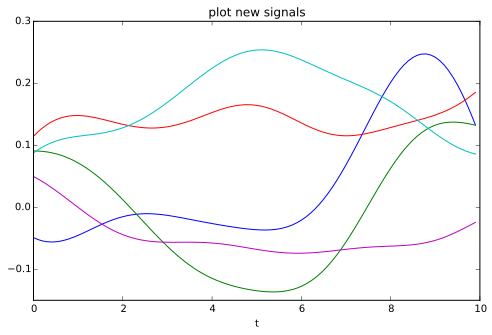

In [43]:
# plot new draws
for i in range(0, x.shape[0]):
    y = np.squeeze(np.asarray(x))
    plt.plot(t.flatten(), y[i,]); plt.title('plot new signals'); plt.xlabel('t');

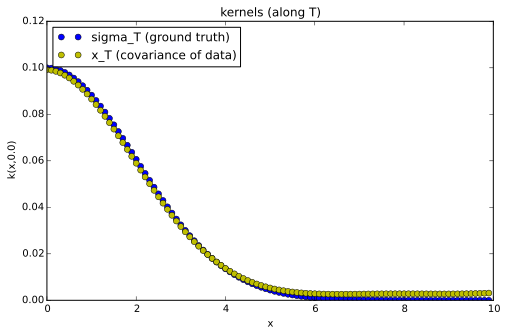

In [44]:
# evaluate results
# plot covariance along T axis (using kernels) and compared with ground truth
plt.plot(t, np.array(sigma_T[0,]).flatten(), 'bo')
_ = plt.plot(t, np.array(x_T[0,]).flatten(), 'yo')

plt.xlabel('x'); plt.ylabel('k(x,0.0)'); plt.title('kernels (along T)')
plt.legend(['sigma_T (ground truth)', 'x_T (covariance of data)'], loc='upper left')

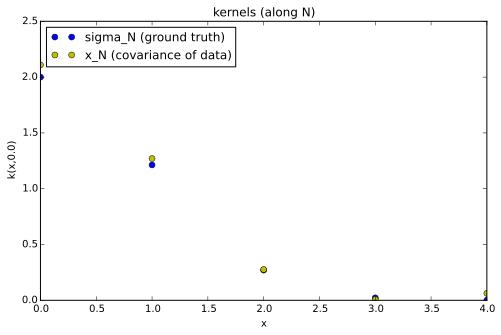

In [45]:
# evaluate results
# plot covariance along N axis (using kernels) and compared with ground truth
plt.plot(n, np.array(sigma_N[0,]).flatten(), 'bo')
_ = plt.plot(n, np.array(x_N[0,]).flatten(), 'yo')
plt.xlabel('x'); plt.ylabel('k(x,0.0)'); plt.title('kernels (along N)')
plt.legend(['sigma_N (ground truth)', 'x_N (covariance of data)'], loc='upper left')